In [102]:
# 1. Importación de Librerías y Carga de Datos

# Primero, importamos las librerías necesarias y cargamos los datos:

import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limitar el número de hilos a 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Se Cargan los datos desde el archivo CSV
data = pd.read_csv('D:\\UNAD_ANDRES\\Mall_Customers.csv')

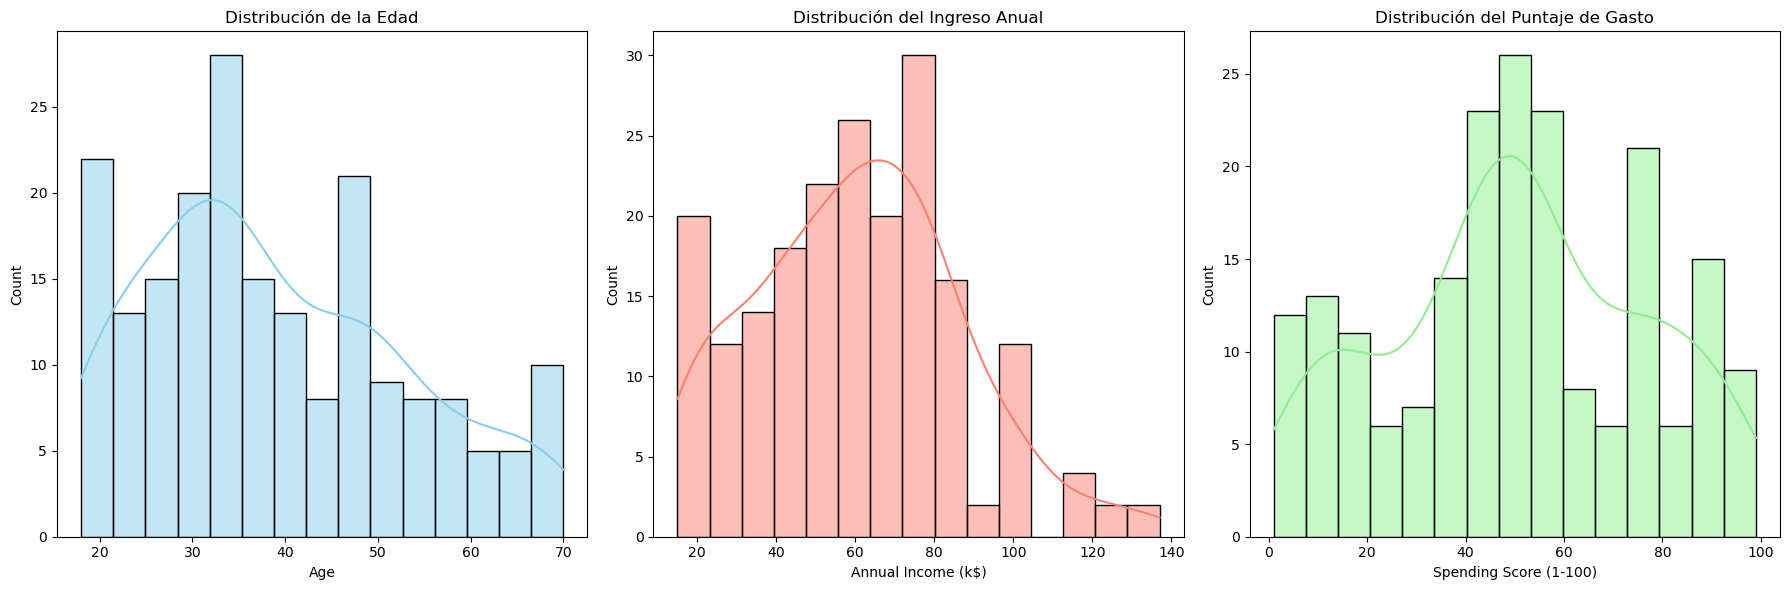

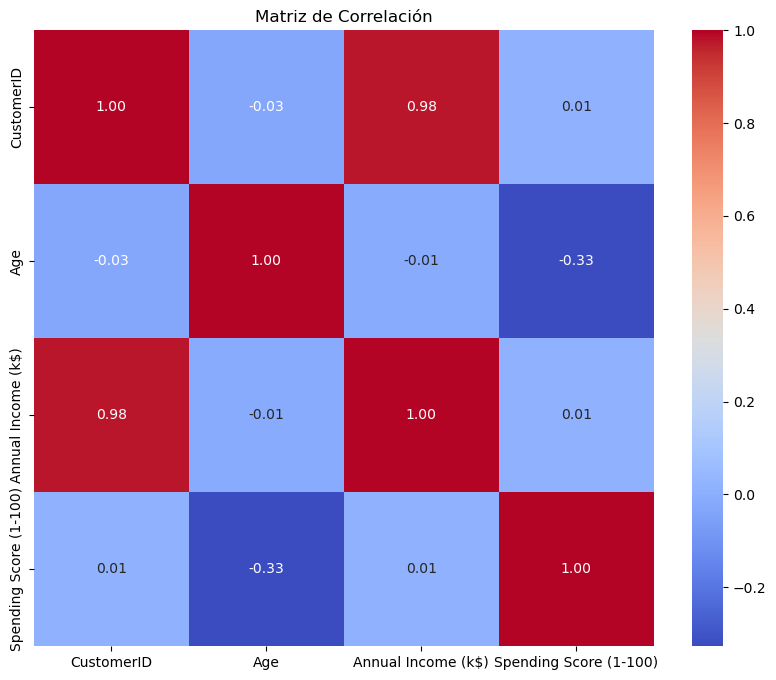

In [104]:
# 2. Análisis Exploratorio de Datos

# Realizamos un análisis exploratorio para entender la distribución de las variables clave:

# Visualización de distribuciones
plt.figure(figsize=(18, 6))

# Histograma de 'Age'
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=15, color='skyblue')
plt.title('Distribución de la Edad')

# Histograma de 'Annual Income (k$)'
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=15, color='salmon')
plt.title('Distribución del Ingreso Anual')

# Histograma de 'Spending Score (1-100)'
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=15, color='lightgreen')
plt.title('Distribución del Puntaje de Gasto')

plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [106]:
# 3. Preprocesamiento de Datos

# Codificamos variables categóricas y normalizamos los datos:

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data_clustering = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].dropna()

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering)

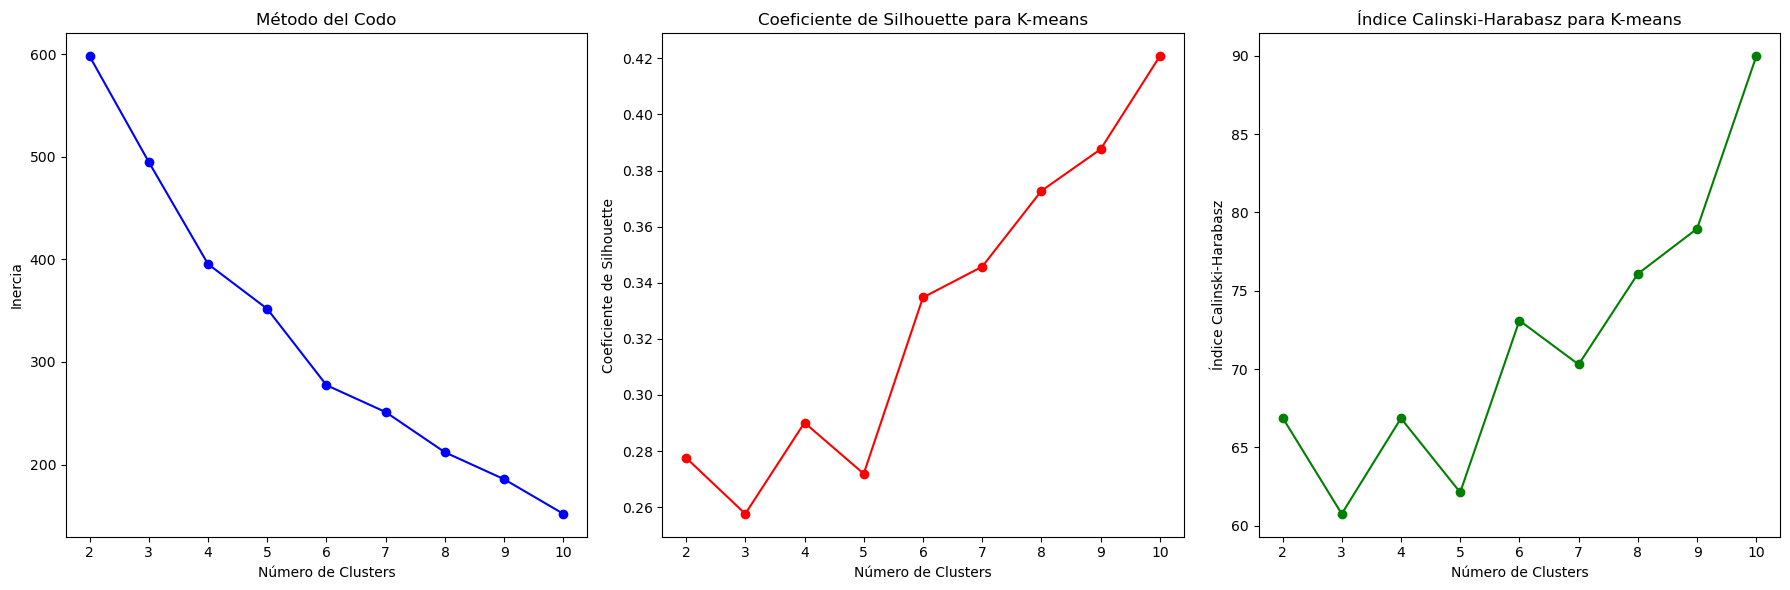

In [108]:
# 4. Selección del Número Óptimo de Clusters

# Se realiza el análisis para determinar el número óptimo de clusters:

range_n_clusters = list(range(2, 11))
inertia = []
silhouette_avg = []
calinski_harabasz = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(data_normalized, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(data_normalized, kmeans.labels_))

# Graficar resultados
plt.figure(figsize=(18, 6))

# Método del Codo
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, inertia, marker='o', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Coeficiente de Silhouette
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='r')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para K-means')

# Índice Calinski-Harabasz
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, calinski_harabasz, marker='o', color='g')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice Calinski-Harabasz')
plt.title('Índice Calinski-Harabasz para K-means')

plt.tight_layout()
plt.show()

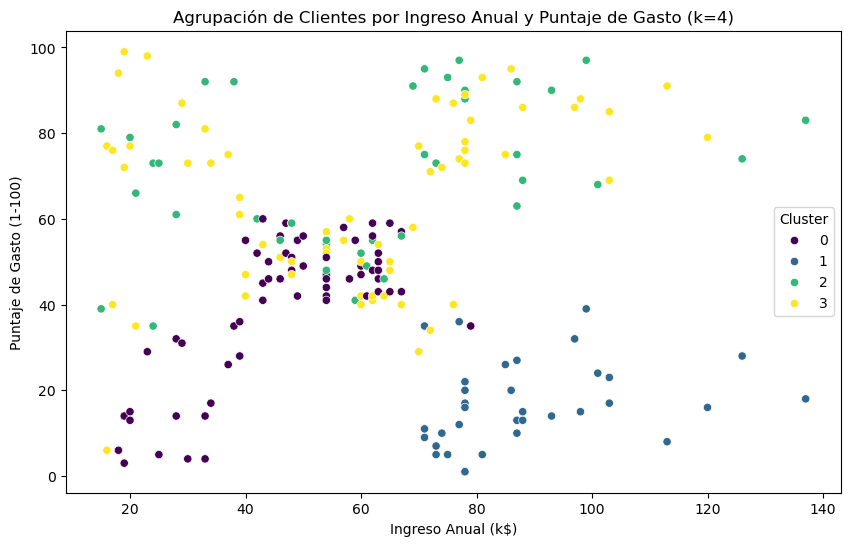

In [110]:
# 5. Entrenamiento Final del Modelo K-means

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_normalized)
data['Cluster'] = kmeans.labels_

# Visualización final de los clusters resultantes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title(f'Agrupación de Clientes por Ingreso Anual y Puntaje de Gasto (k={optimal_k})')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

In [96]:
# 6. Evaluación Final del Modelo K-means

# finalmente, evaluamos el modelo:

print(f'Número óptimo de clusters (K-means): {optimal_k}')
print(f'Coeficiente Silhouette: {silhouette_score(data_normalized, kmeans.labels_)}')
print(f'Índice Calinski-Harabasz: {calinski_harabasz_score(data_normalized, kmeans.labels_)}')

Número óptimo de clusters (K-means): 4
Coeficiente Silhouette: 0.29010917402310876
Índice Calinski-Harabasz: 66.85612604777728
